In [15]:
import pandas as pd

df = pd.read_csv("/content/seattle-weather.csv")

print(df.head())

         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB
None


In [17]:
print(df.isnull().sum())
print(df.describe())


date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64
       precipitation     temp_max     temp_min         wind
count    1461.000000  1461.000000  1461.000000  1461.000000
mean        3.029432    16.439083     8.234771     3.241136
std         6.680194     7.349758     5.023004     1.437825
min         0.000000    -1.600000    -7.100000     0.400000
25%         0.000000    10.600000     4.400000     2.200000
50%         0.000000    15.600000     8.300000     3.000000
75%         2.800000    22.200000    12.200000     4.000000
max        55.900000    35.600000    18.300000     9.500000


In [18]:
df = df.drop(columns=['date', 'weather'])

In [19]:
print(df.isnull().sum())

precipitation    0
temp_max         0
temp_min         0
wind             0
dtype: int64


In [20]:
X = df[['precipitation', 'temp_min', 'wind']]
y = df['temp_max']


In [21]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


In [23]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [24]:
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 11.10351869094823
R^2 Score: 0.8048863326426143


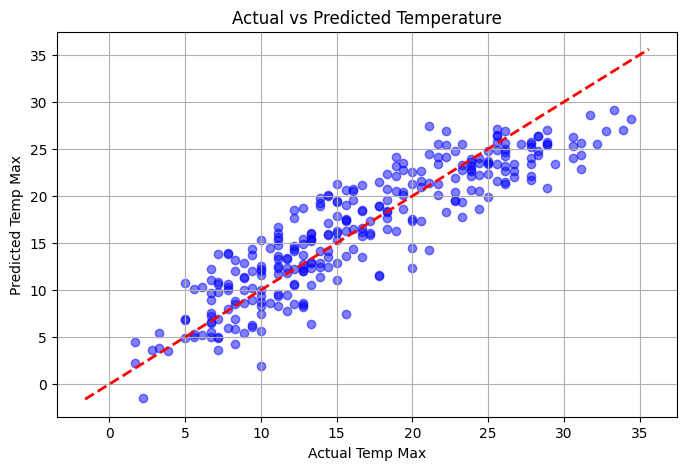

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Temp Max')
plt.ylabel('Predicted Temp Max')
plt.title('Actual vs Predicted Temperature')
plt.grid(True)
plt.show()
